In [1]:
import zipfile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [2]:
# extract the test.zip and train.zip files

train_zip = zipfile.ZipFile('training.zip')
train_zip.extractall()

test_zip = zipfile.ZipFile('test.zip')
test_zip.extractall()

In [3]:
# read train.csv 

train_csv = pd.read_csv('training.csv')
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [4]:
train_csv.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [5]:
# check for missing values

train_csv.isnull().any().value_counts()

True     28
False     3
dtype: int64

所以遗失的数据有 28 行。有两种解决一种是把所在的列也删掉，一种是用其他数据来填充遗失的数据。前者会减少数据，不建议这么做。所以用第二种方法处理遗失数据。

In [6]:
train_csv.fillna(method='ffill', inplace=True)

In [7]:
# check for missing values after filling missing values

train_csv.isnull().any().value_counts()

False    31
dtype: int64

缺失的数据已经被填充了。

接下来要做的就是还原图片数据，打印绘制图片。

In [8]:
img = train_csv['Image']
img.shape

(7049,)

In [9]:
imag = []
for i in range(0, 7049):
    img = train_csv['Image'][i].split(' ') # 以空格来分隔
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [10]:
# reshape and convert it into float value 

image_list = np.array(imag, dtype='float')
print(image_list.shape)
X_train = image_list.reshape(-1, 96, 96)

(7049, 9216)


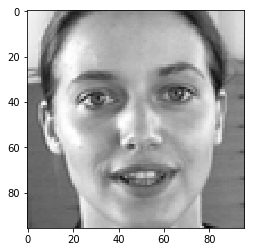

In [11]:
# plot the image

plt.imshow(X_train[20], cmap='gray')
plt.show()

In [12]:
# separate labels

# Drop specified labels from rows or columns,1 means columns
training = train_csv.drop('Image', axis=1) 

y_train = []
for i in range(0, 7049):
    y = training.iloc[i, :]
    y_train.append(y)
    
y_train = np.array(y_train, dtype='float')

In [13]:
from keras.layers import Conv2D, Dropout, Dense, Flatten
from keras.models import Sequential
from keras import optimizers

model = Sequential([Flatten(input_shape=(96,96)),
                     Dense(128, activation="relu"),
                     Dropout(0.1),
                     Dense(64, activation="relu"),
                     Dense(30)
                       ])
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam,
              loss='mse',
              metrics=['mae', 'accuracy'])

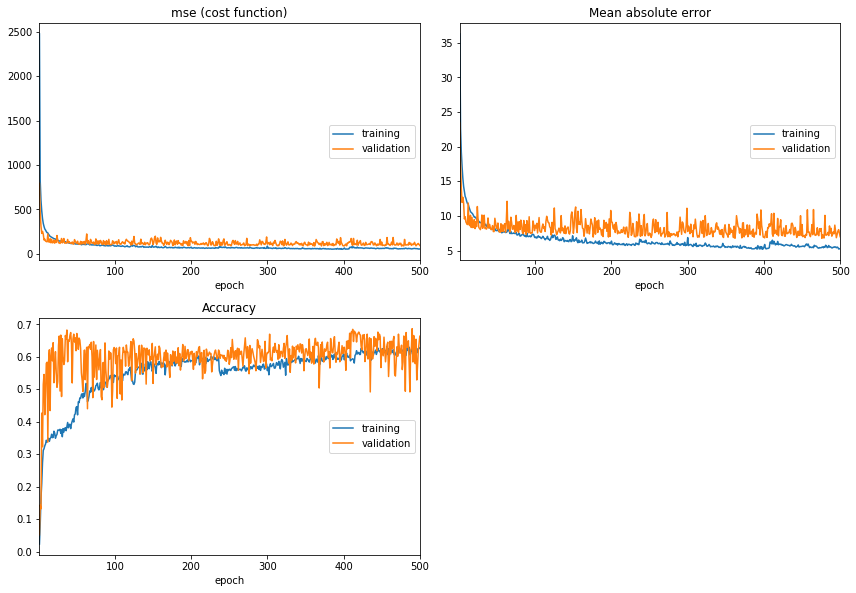

mse (cost function):
training   (min:   50.933, max: 2479.020, cur:   53.660)
validation (min:   87.946, max:  793.761, cur:   93.733)

Mean absolute error:
training   (min:    5.185, max:   36.296, cur:    5.225)
validation (min:    6.769, max:   23.425, cur:    7.008)

Accuracy:
training   (min:    0.024, max:    0.634, cur:    0.628)
validation (min:    0.052, max:    0.687, cur:    0.664)


In [14]:
model.fit(X_train, y_train, 
          epochs=500, batch_size=128, 
          validation_split=0.2,
          callbacks=[PlotLossesKeras()])

In [15]:
# read test.csv 

test_csv = pd.read_csv('test.csv')
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 27.9+ KB


In [16]:
# preparing test data

timag = []
for i in range(0, 1783):
    timg = test_csv['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [17]:
timage_list = np.array(timag, dtype='float')
X_test = timage_list.reshape(-1, 96, 96)

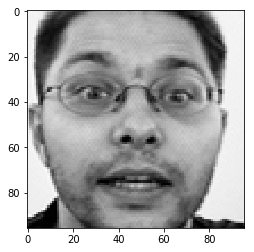

In [18]:
plt.imshow(X_test[0], cmap='gray')
plt.show()

In [19]:
pred = model.predict(X_test)

In [20]:
pred.shape

(1783, 30)

In [21]:
lookid_csv = pd.read_csv("IdLookupTable.csv")
lookid_list = list(lookid_csv['FeatureName'])
imageID = list(lookid_csv['ImageId'] - 1)
pre_list = list(pred)

In [22]:
rowid = lookid_csv['RowId']
rowid = list(rowid)

In [23]:
feature = []
for f in list(lookid_csv['FeatureName']):
    feature.append(lookid_list.index(f))

In [24]:
preded = []
for x,y in zip(imageID, feature):
    preded.append(pre_list[x][y])

In [25]:
rowid = pd.Series(rowid, name='RowId')

In [26]:
loc = pd.Series(preded, name='Location')

In [27]:
submission = pd.concat([rowid,loc], axis=1)

In [28]:
submission.to_csv('face_key_detection_submission.csv', index=False)